##Exploring Weather Trends

In [49]:
#Importing needed libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [50]:
#Importing data files
#Global Average Temperature data by year
global_avg_temp = pd.read_csv(r'C:\Users\ZoilaFlores\OneDrive\Documents\Programming\Python\weather_analysis\global_results.csv')

#City Average Temperature data by year
city_avg_temp = pd.read_csv(r'C:\Users\ZoilaFlores\OneDrive\Documents\Programming\Python\weather_analysis\New_York_results.csv')

#Global vs City Average Temperature data by year 1750-2015
glob_vs_city_avg_temp = pd.read_csv(r'C:\Users\ZoilaFlores\OneDrive\Documents\Programming\Python\weather_analysis\New_York_vs_global_results.csv')

In [51]:
#Global Average Temperature dataframe first 5 rows
df = global_avg_temp.head(5)
fig =  go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.year, df.avg_temp],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(width=500, height=300)
fig.write_image("images/table_global_avg_temp.png")
fig.show()

In [52]:
#New York City Average Temperature dataframe first 5 rows
df2 = city_avg_temp.head(5)
fig2 =  go.Figure(data=[go.Table(
    header=dict(values=list(df2.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df2.year, df2.avg_temp, df2.country, df2.avg_temp],
               fill_color='lavender',
               align='left'))
])
fig2.update_layout(width=800, height=300)
fig2.write_image("images/table_NYC_avg_temp.png")
fig2.show()

In [66]:
#New York City vs Global Average Temperature dataframe first 5 rows
#glob_vs_city_avg_temp.head(5)

df3 = glob_vs_city_avg_temp.head(5)
fig3 =  go.Figure(data=[go.Table(
    header=dict(values=list(df3.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df3.year, df3.nyc_avg_temp, df3.g_avg_temp, df3['diff']],
               fill_color='lavender',
               align='left'))
])
fig3.update_layout(width=800, height=300)
fig.write_image("images/table_NYC_vs_glob_avg_temp.png")
fig3.show()

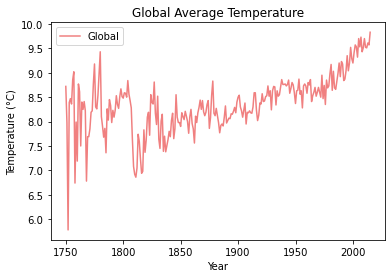

In [39]:
#Initial look at global average temperature data
plt.plot(global_avg_temp['year'],global_avg_temp['avg_temp'],label='Global',color='lightcoral')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature (°C)") 
plt.title("Global Average Temperature")
plt.savefig('images/globalavgtemp.png', dpi=100)
plt.show()

In [11]:
Observation 1
##For data available, after the early 1800's, Global average annual temperatures began to slowly rise.
##After 1960-1980s, temperatures accelerated up to present years.

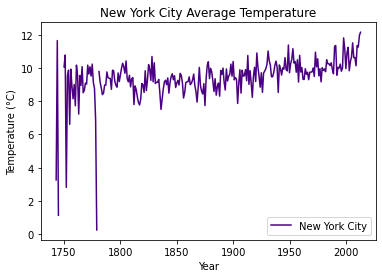

In [40]:
#Initial look at New York City average temperature data
plt.plot(city_avg_temp['year'],city_avg_temp['avg_temp'],label='New York City', color='#4b0082')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature (°C)") 
plt.title("New York City Average Temperature")
plt.savefig('images/NYCavgtemp.png', dpi=100)
plt.show()

In [13]:
Observation 2
##New York City average annual tempertures remained flat from 1800 to the early 1900s.
##Then from 1900s to the 1950, temperatures began to rise.
##There was a short drop from 1960-1970s, but temperatures began to rise again up through today.

In [14]:
#Calculation of moving averages to smooth out the data
global_mov_avg = global_avg_temp['avg_temp'].rolling(window=20).mean()
global_mov_avg2 = global_avg_temp['avg_temp'].rolling(window=50).mean()
city_mov_avg = city_avg_temp['avg_temp'].rolling(window=20).mean()
city_mov_avg2 = city_avg_temp['avg_temp'].rolling(window=50).mean()

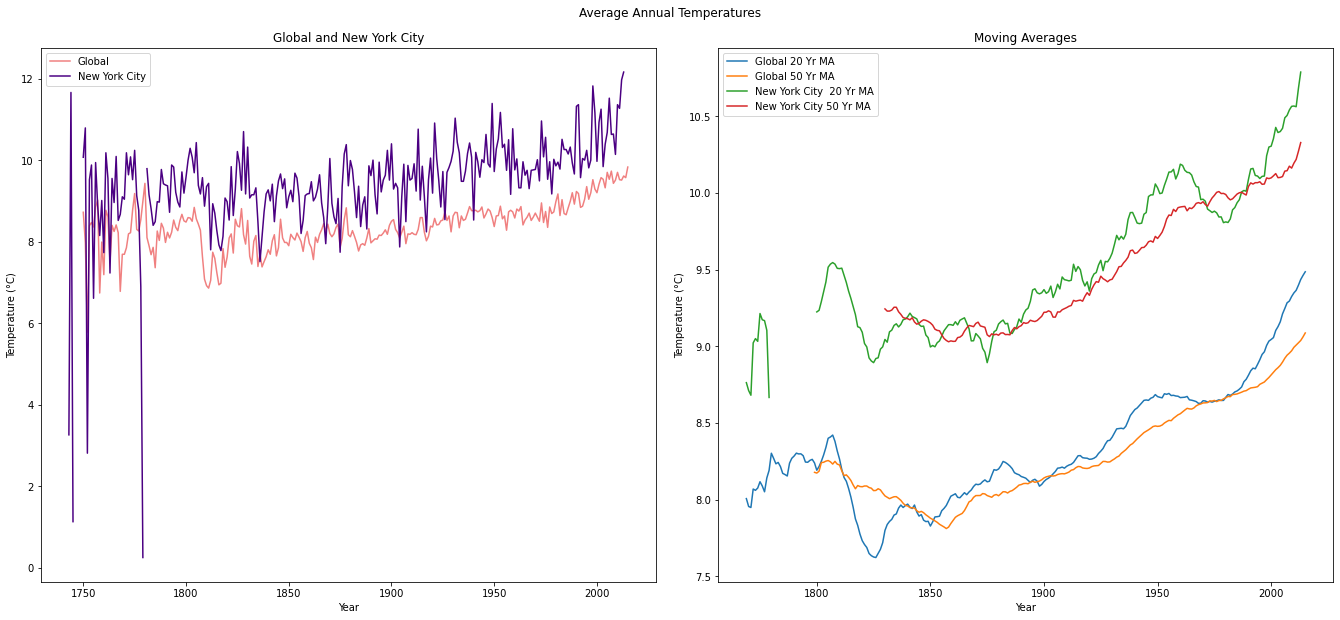

In [41]:
#Local Data is New York City
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(18.5, 8.5)
fig.suptitle('Average Annual Temperatures')


ax1.plot(global_avg_temp['year'],global_avg_temp['avg_temp'],label='Global',color='lightcoral')
ax1.plot(city_avg_temp['year'],city_avg_temp['avg_temp'],label='New York City', color='#4b0082')

ax2.plot(global_avg_temp['year'],global_mov_avg,label='Global 20 Yr MA')
ax2.plot(global_avg_temp['year'],global_mov_avg2,label='Global 50 Yr MA')

ax2.plot(city_avg_temp['year'],city_mov_avg,label='New York City  20 Yr MA')
ax2.plot(city_avg_temp['year'],city_mov_avg2,label='New York City 50 Yr MA')

ax1.legend()
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature (°C)") 
ax1.set_title("Global and New York City")
ax2.legend()
ax2.set_title("Moving Averages")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature (°C)") 
plt.savefig('images/AvgAnnTempMA.png', dpi=100)
plt.show()

In [16]:
Observation 3
##Comparing New York City to Global average annual temperatures, New York City is on average
##1 to 4 degrees Celcius higher than average Global temperatures
##
##However, annual trends appear to be consistant between the Globe and New York City.
##
##Notes regarding data sets. Data provided by the Berkley Project through Kaggle.
##Some early data periods are missing, creating large variances
##in the global average annual temperatures.
##
##Through furture research, the provided data is also for land temperatures only,
##so global doesn't include ocean surface temperatures.

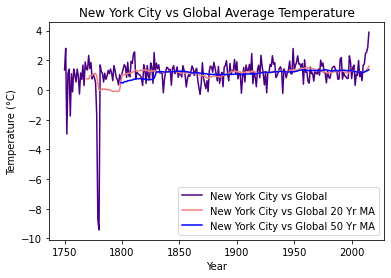

In [42]:
#Detailed look at New York City average temperature data vs the globe
glob_vs_city_mov_avg = glob_vs_city_avg_temp['diff'].rolling(window=20).mean()
glob_vs_city_mov_avg2 = glob_vs_city_avg_temp['diff'].rolling(window=50).mean()

plt.plot(glob_vs_city_avg_temp['year'],glob_vs_city_avg_temp['diff'],label='New York City vs Global', color='#4b0082')
plt.plot(glob_vs_city_avg_temp['year'],glob_vs_city_mov_avg,label='New York City vs Global 20 Yr MA', color='lightcoral')
plt.plot(glob_vs_city_avg_temp['year'],glob_vs_city_mov_avg2,label='New York City vs Global 50 Yr MA', color='blue')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature (°C)") 
plt.title("New York City vs Global Average Temperature")
plt.savefig('images/globvsNYCavgtemp.png', dpi=100)
plt.show()

In [ ]:
Observation 4
##Overall, the variance between New York City reported average annual temperatures
##and the Global temperatures is within a narrow range of 1-2 degrees Celsius.

In [ ]:
Future thoughts: I would be interesting to look at seasonality variances and ocean surface tempertures
vs Global land and total Global temperatures.